# Customer-Churn-Prediction
First, we need to import the necessary libraries for data analysis, model training, and evaluation. These libraries include:

- **Data Processing**: `pandas`, `numpy`
- **Visualization**: `matplotlib.pyplot`, `seaborn`
- **Modeling and Evaluation**: `sklearn`, `xgboost`, `imblearn`
- **Saving and Loading Models**: `joblib`

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import RobustScaler

## Data Exploration & Preprocessing
### Examine the Data
#### Review the Dataset Structure
We load the dataset and inspect its structure to understand the features (columns) and their data types.

In [2]:
# Load the dataset
df = pd.read_csv('churn.csv')

# Check the shape of the dataset (rows, columns)
print("Dataset shape (rows, columns):\n", df.shape)

# Get dataset information (column names, non-null counts, data types)
print("Dataset Info:\n")
df.info()

# Display first 5 rows
print("\nFirst 5 rows:\n", df.head())

Dataset shape (rows, columns):
 (10000, 14)
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

First 5 rows:
    RowNumber  Custo

The dataset includes these columns:

- RowNumber: The row number of each customer in the data.

- CustomerId: An individual identifier for each customer.

- Surname: The customer's  surname.

- CreditScore: The customer’s credit score (the higher the better).

- Geography: The customer’s location

- Gender: The customer's gender

- Age: The customer’s age.

- Tenure: The length of time the customer has been with the bank (in years).

- Balance: The balance in the user’s account.

- NumOfProducts: The number of banking products the customer uses (e.g., checking, savings, loans, etc.).

- HasCrCard: Does the customer have a credit card? (1 means yes, 0 means no).

- IsActiveMember: Is the customer active? (1 means active, 0 means inactive).

- EstimatedSalary: The customer’s estimated salary.

- Exited: Has the customer left the bank? (1 means left, 0 means not left).

#### Summarize the Data
Calculate summary statistics for the numerical columns to understand the distribution, central tendency, and spread of the data.

In [3]:
# Summary statistics for numerical columns
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min

The table provides descriptive statistics for each column in the dataset. Here's what each row means:

- count: The number of non-missing values in the column.

All columns have 10,000 entries, meaning there are no missing values.

- mean: The average value of the column.

For example: The average credit score is 650.53, and the average age is 38.92.

- std: The standard deviation, which measures the dispersion of the data around the mean.

For example, the standard deviation for Age is about 10.49, meaning that customers are typically between 28 and 49 years old.

- min: The minimum value in the column.

For example: The youngest customer is 18 years old, and the lowest credit score is 350.

- 25%: The 25th percentile (first quartile).

For example: 25% of customers have a balance of 0 or less, and 25% are 32 years old or younger.

- 50%: The 50th percentile (median).

For example: The median credit score is 652, and the median balance is 97,198.54.

- 75%: The 75th percentile (third quartile).

For example: 75% of customers have a credit score of 718 or less, and 75% are 44 years old or younger.

- max: The maximum value in the column.

For example: The oldest customer is 92 years old, and the highest credit score is 850.

#### Checking for Missing Values
Missing values can affect the performance of the model, so it's essential to handle them appropriately. After checking, we find there are no missing values.

In [4]:
# Total missing values per column
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


#### Histograms

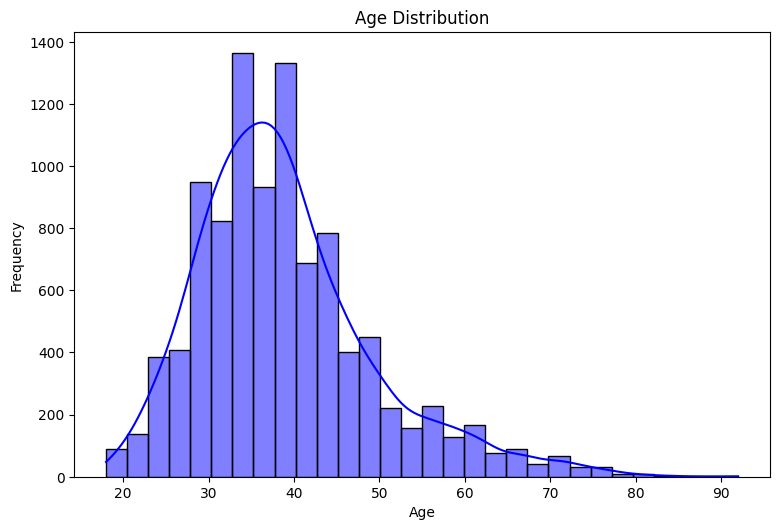

In [5]:
# General settings for charts
plt.figure(figsize=(15, 10))

# Age histogram
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show charts
plt.tight_layout()
plt.show()

- X-Axis (Age):

Represents the age of customers, ranging from 18 to 92 years.

- Y-Axis (Frequency):

Represents the number of customers (frequency) in each age group (bin).

- Bars:

Each bar corresponds to a specific age range (bin) and shows how many customers fall into that range.

##### Observations from the Histogram
- Peak Age Group:

The highest bars indicate the age groups with the most customers.

From the histogram, the peak appears to be around 30–40 years, suggesting this is the most common age group in the dataset.

- Spread of Ages:

The distribution shows a gradual decrease in frequency as age increases beyond the peak.

There are fewer customers in the 60+ age groups compared to younger age groups.

- Shape of the Distribution:

The histogram appears to be right-skewed, meaning there is a longer tail on the right side (older ages).

This indicates that while most customers are younger, there is still a significant number of older customers.

- Outliers:

The histogram shows some customers in the 80–90 age range, though the frequency is very low.

These could be considered outliers or less common in the dataset.

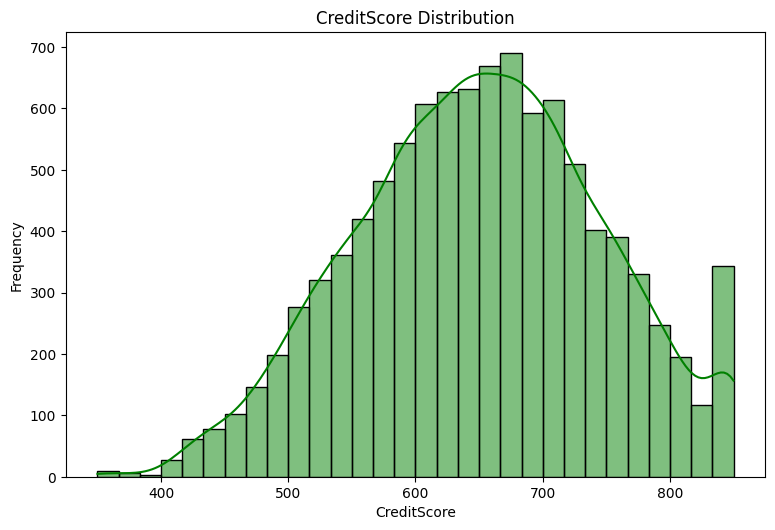

In [6]:
# General settings for charts
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.histplot(df['CreditScore'], bins=30, kde=True, color='green')
plt.title('CreditScore Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

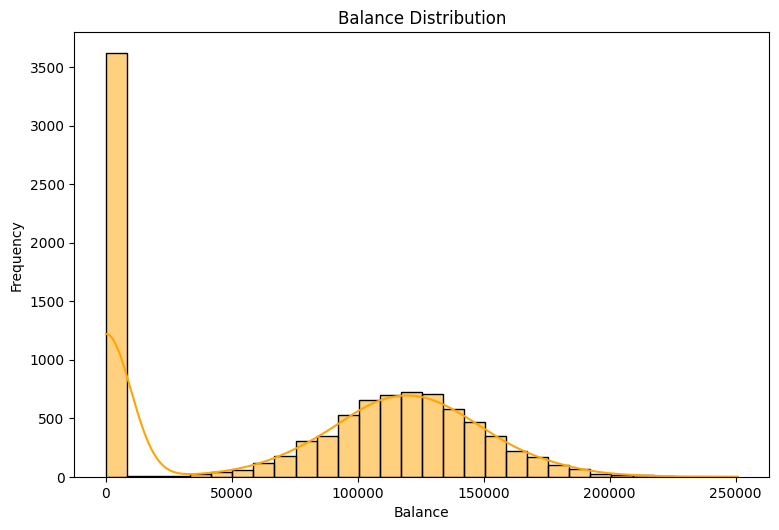

In [7]:
# Balance histogram
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.histplot(df['Balance'], bins=30, kde=True, color='orange')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

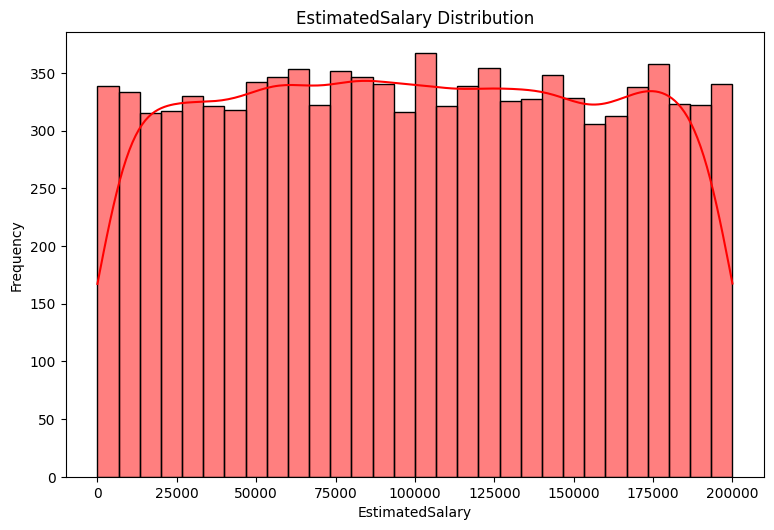

In [8]:
# EstimatedSalary histogram
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
sns.histplot(df['EstimatedSalary'], bins=30, kde=True, color='red')
plt.title('EstimatedSalary Distribution')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

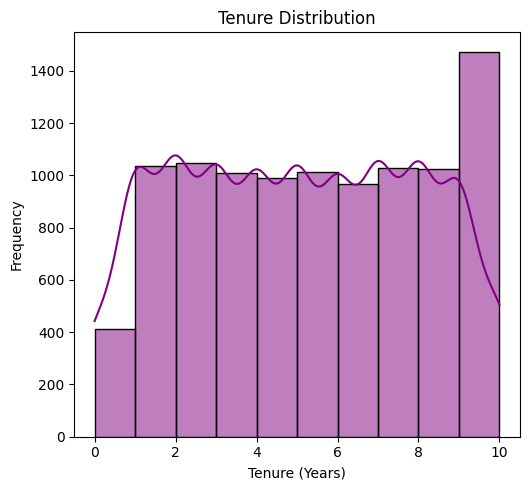

In [9]:
# Tenure histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Tenure'], bins=10, kde=True, color='purple')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

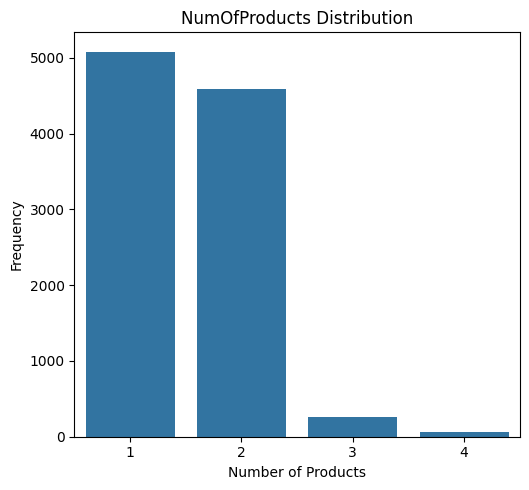

In [10]:
# NumOfProducts bar plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
sns.countplot(x='NumOfProducts', data=df)
plt.title('NumOfProducts Distribution')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

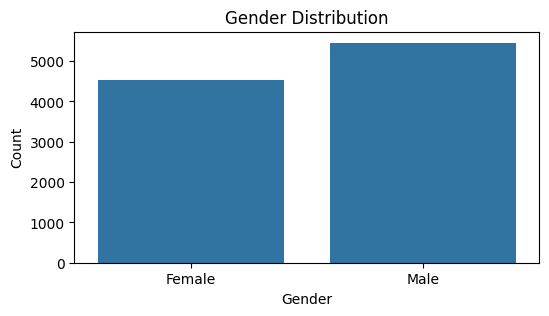

In [11]:
# Gende bar plot
plt.figure(figsize=(6, 3))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Data Cleaning
We do not need RowNumber, CustomerId, Surname and we drop them.

In [12]:
# Remove RowNumber, CustomerId, Surname
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

#### Converting non-numeric columns
We do not need 'Surname' column but 'Gender', 'Geography' are important for our model. So, we convert them to numeric values. 

In [13]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

print(df)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1              False   
1          

#### Boxplots

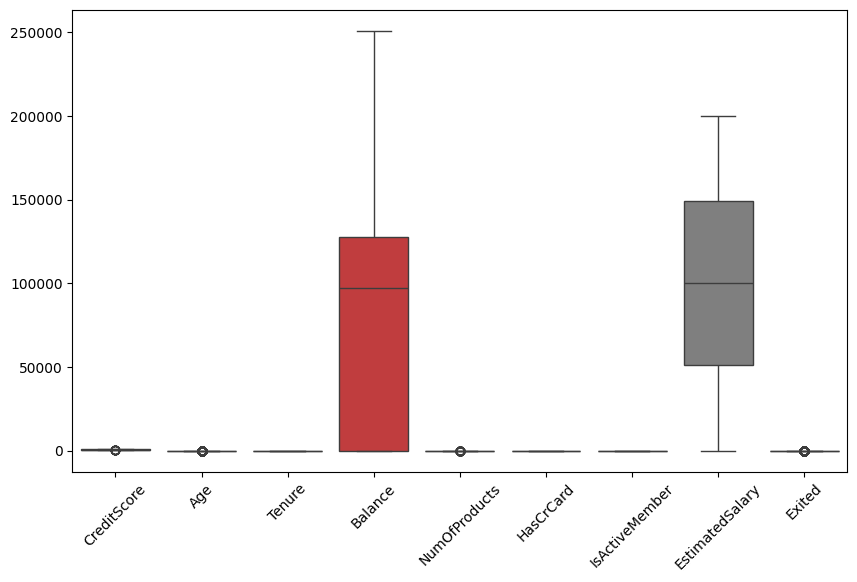

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.show()

- The circular points indicate outlier values.
- The features `Balance` and `EstimatedSalary` have a wider distribution.
- The features `CreditScore`, `Age`, `NumOfProducts`, have outlier values.
- The features `Tenure`, `HasCrCard`, `IsActiveMember` have almost no outlier values. These features have a more uniform distribution and fewer outlier values.

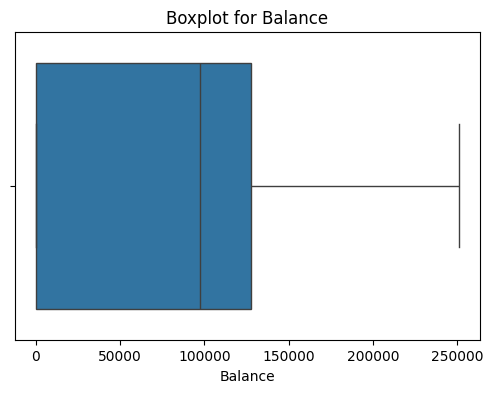

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Balance'])
plt.title("Boxplot for Balance")
plt.show()


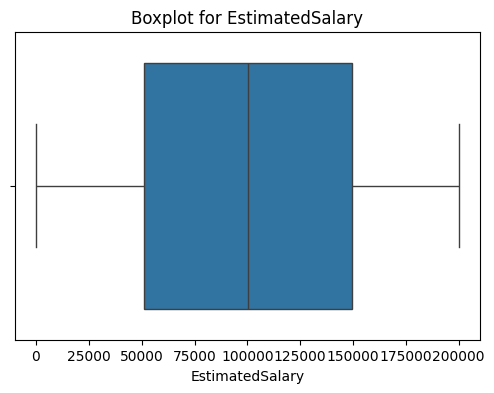

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['EstimatedSalary'])
plt.title("Boxplot for EstimatedSalary")
plt.show()

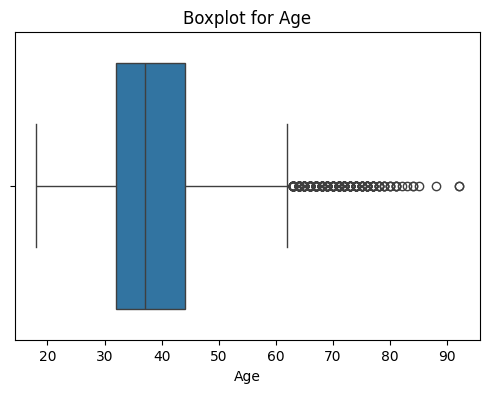

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot for Age")
plt.show()

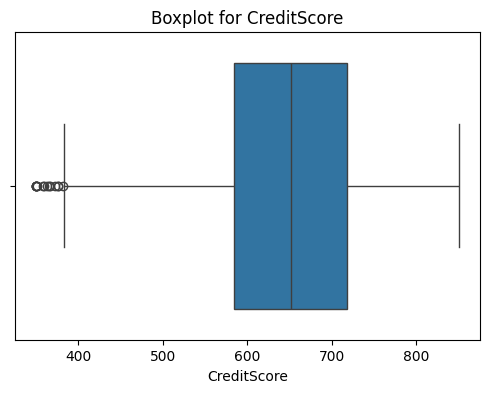

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['CreditScore'])
plt.title("Boxplot for CreditScore")
plt.show()

#### Handling outliers
In scaling methods, extremely large or small values are normalized to reduce their impact on the model. We use `RobustScaler`, a scaling technique provided by scikit-learn, to reduce the impact of outliers. It's particularly useful when our data contains outliers. Unlike StandardScaler, which uses the mean and standard deviation, RobustScaler uses the median and the interquartile range (IQR) to scale the data. This makes it more robust to outliers.

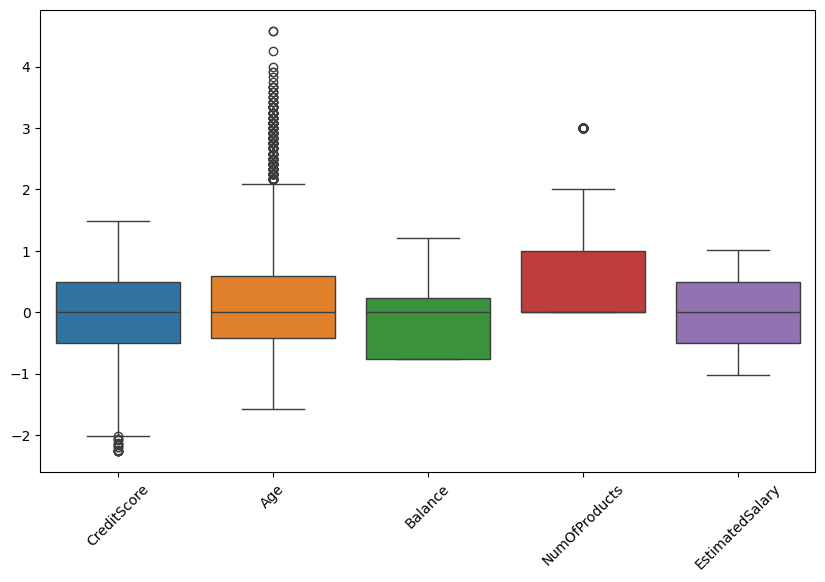

In [21]:
# Select the columns that need scaling
columns_to_scale = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Use RobustScaler to reduce the impact of outliers
scaler = RobustScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Show the boxplot after scaling
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_to_scale])
plt.xticks(rotation=45)
plt.show()

The data has been rescaled and its distribution has changed after applying `RobustScaler` techniques. This change is intended to improve the performance of models.

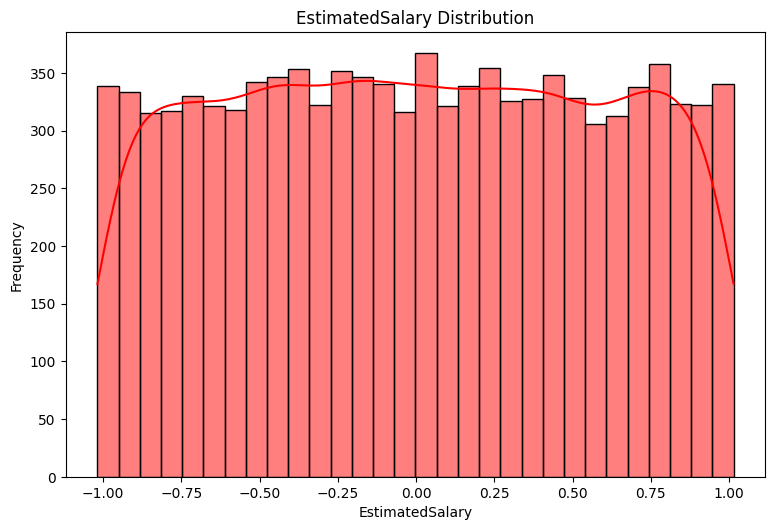

In [22]:
# EstimatedSalary histogram
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
sns.histplot(df['EstimatedSalary'], bins=30, kde=True, color='red')
plt.title('EstimatedSalary Distribution')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

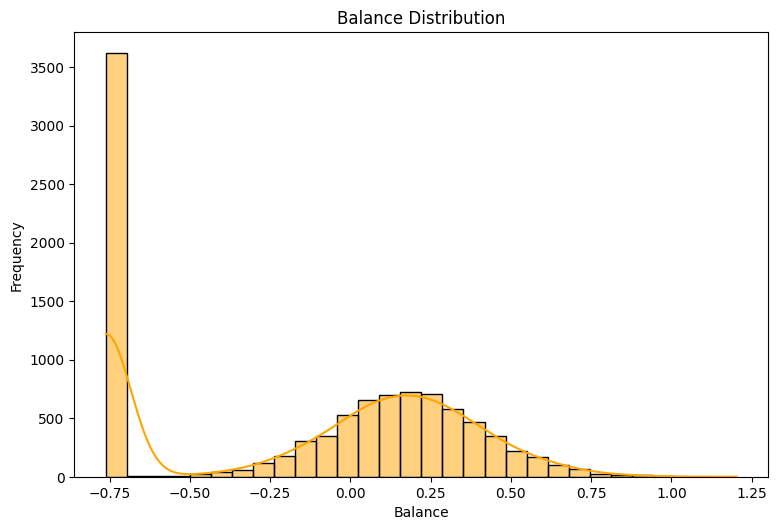

In [23]:
# Balance histogram
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.histplot(df['Balance'], bins=30, kde=True, color='orange')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

After scaling, we use sigma clipping to remove outliers from a dataset.

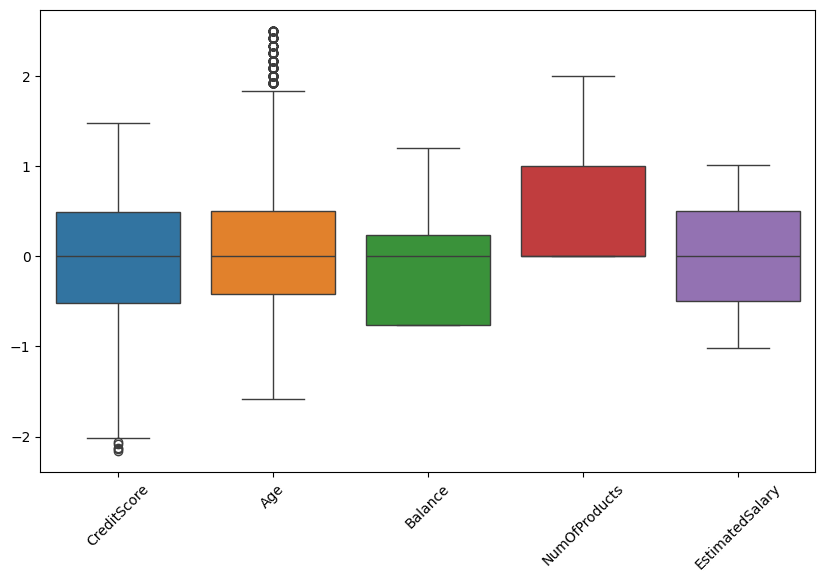

In [28]:
# Remove outliers using Sigma Clipping
def sigma_clipping(df, columns, sigma=3, maxiters=5):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - sigma * std
        upper_bound = mean + sigma * std
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = sigma_clipping(df, columns_to_scale)

# Boxplot chart
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_to_scale])
plt.xticks(rotation=45)
plt.show()

The Boxplot shows that there are still outliers in some features. However, the impact of these outliers on the model has been reduced.

## Feature Engineering
We can perform Feature Engineering on your dataset to create new features that are useful in predicting churn.
### 1. Customer Engagement Score
- Combining the `IsActiveMember` and `HasCrCard` features
- Giving more value to customers who are active and have a credit card.
- Suggested formula:
$$Engagement_Score=IsActiveMember×2+HasCrCard$$
- Higher value = more active and engaged customer.

In [29]:
# Customer Engagement Score
df['Engagement_Score'] = df['IsActiveMember'] * 2 + df['HasCrCard']

### 2. Balance to Salary Ratio
- It measures how much of income the customer has in the bank.
- Suggested formula:
$$
{Balance\_Salary\_Ratio} = \frac{Balance}{EstimatedSalary}
$$
- A very high or low value may indicate risky behavior.

In [30]:
# Balance to Salary Ratio
df['Balance_Salary_Ratio'] = df['Balance'] / (df['EstimatedSalary'] + 1)  # Prevent division by zero

### 3. Account Stability Score
- Combination of `Tenure` (duration of membership in the bank) and `Age`. What the score means: The Stability score indicates how long a customer has been with the bank in their lifetime. In other words, it indicates how loyal the customer has been to the bank.
- Suggested formula:
$$Stability\_Score = \frac{Age}{Tenure}$$
- Higher value = The customer has been with the bank for a long time and is likely to be loyal to it.

In [31]:
# Stability Score
df['Stability_Score'] = df['Tenure'] / df['Age']
df['Exit_Risk'] = (1000 - df['CreditScore']) / df['Age']

### 4. Exit Risk Factor
- Combination of `CreditScore` and `Age`
- Suggested formula:
$$Exit\_Risk = \frac{1000 - {CreditScore}}{Age}$$
- Younger customers with lower Credit Score may have higher risk.

In [32]:
# Exit Risk Factor
df['Exit_Risk'] = (1000 - df['CreditScore']) / df['Age']

Save the processed dataset

In [33]:
# Save the processed dataset
df.to_csv('processed_churn.csv', index=False)

### Investigating the impact of new features
#### Comparing Customer Engagement Scores between retained and churned customers

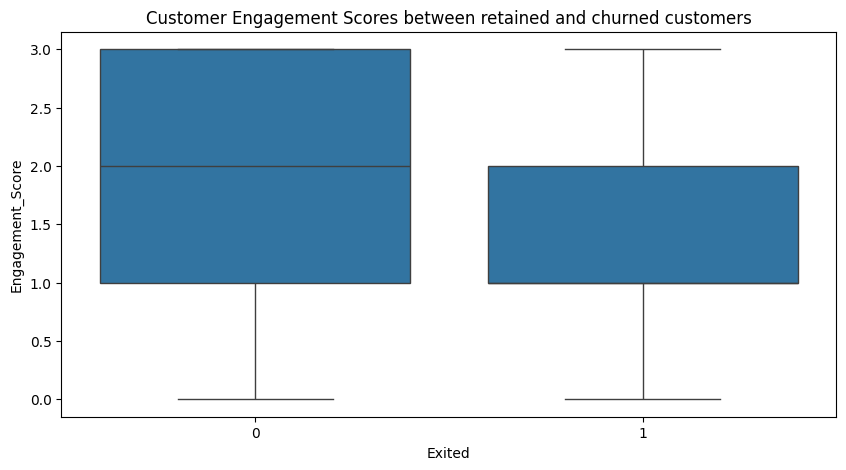

In [47]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Exited'], y=df['Engagement_Score'])
plt.title("Customer Engagement Scores between retained and churned customers")
plt.show()

Looking closely at the plot, we can see the following points:

- Difference in Mean: The mean customer engagement score for customers who stayed with the bank (Exited=0) is clearly higher than the mean engagement score for customers who left the bank (Exited=1). This shows that customers who interact more with the bank are less likely to leave the bank.

- Data Dispersion: The dispersion of the data (the length of the box and the lines around it) is almost the same in both groups. This shows that the variation in customer engagement scores is almost the same in both groups.

- Conclusion:

This graph clearly shows that there is a significant relationship between a customer’s engagement score and their exit status. In general, customers with higher engagement scores are less likely to leave the bank. This finding could be useful for banks to improve customer engagement and reduce churn rates.

#### Comparing Balance Salary Ratio between retained and churned customers

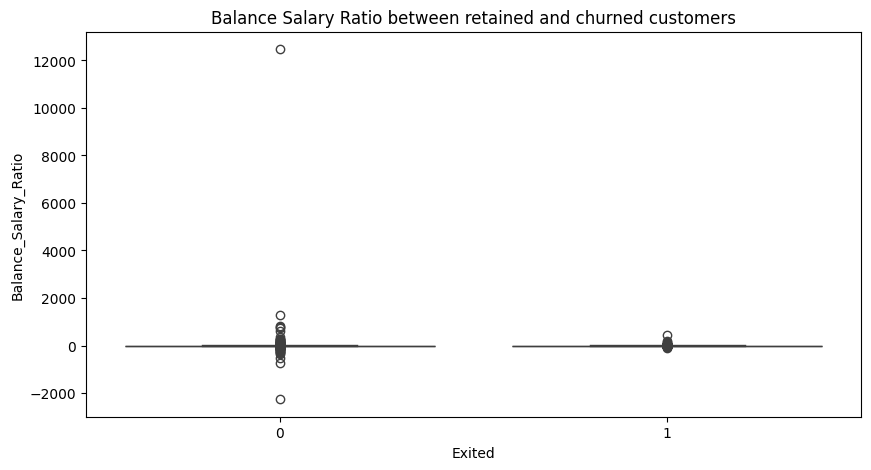

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Exited'], y=df['Balance_Salary_Ratio'])
plt.title("Balance Salary Ratio between retained and churned customers")
plt.show()

By looking carefully at the graph, we can see the following points:

- Distribution of points: In general, the distribution of points in the two groups (left and stayed) is very similar and there is not much difference in the dispersion of the data.

- Outliers: In both groups, there are outliers (points that are very far from the other points). These points indicate customers who have a very high or very low balance to salary ratio.

- Conclusion:
According to this graph, it does not seem that the "balance to salary ratio" alone can be an important factor in customer churn, because the distribution of this ratio is almost the same in both groups. This means that customers who left the bank and customers who stayed in the bank have, on average, similar balance to salary ratios.

#### Comparing Stability Scores between retained and churned customers

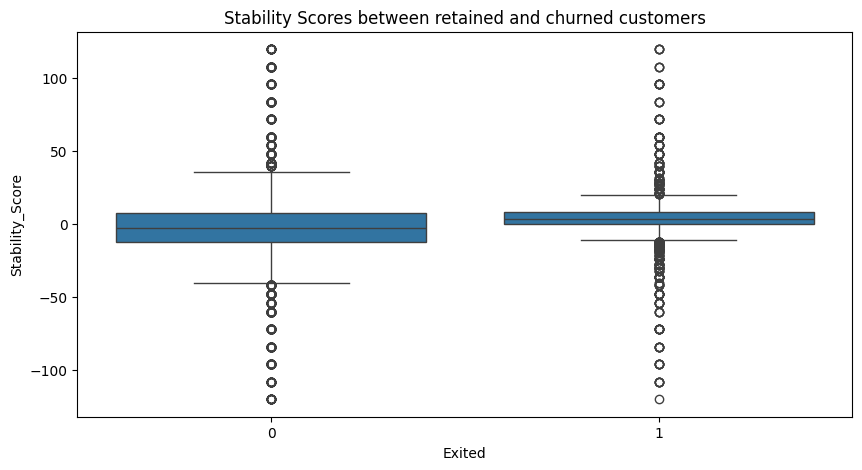

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Exited'], y=df['Stability_Score'])
plt.title("Stability Scores between retained and churned customers")
plt.show()

Looking closely at the graph, we can see the following points:

- Data Dispersion: The data dispersion is relatively high in both groups, but the data dispersion seems to be slightly higher for customers who left the bank.

- Outliers: In both groups, outliers are observed. These data indicate customers with very high or very low stability scores. Especially in the group of customers who left the bank, the number of outliers is higher and with significant negative scores, which could indicate a relationship between low stability scores and leaving the bank.

- Conclusion:
Overall, there appears to be a relationship between “stability score” and “bank churn.” Customers with higher resilience scores are more likely to stay with the bank. However, this relationship is not very strong, and other factors can also influence a customer’s decision to leave the bank.

#### Comparing Exit Risk factor between retained and churned customers

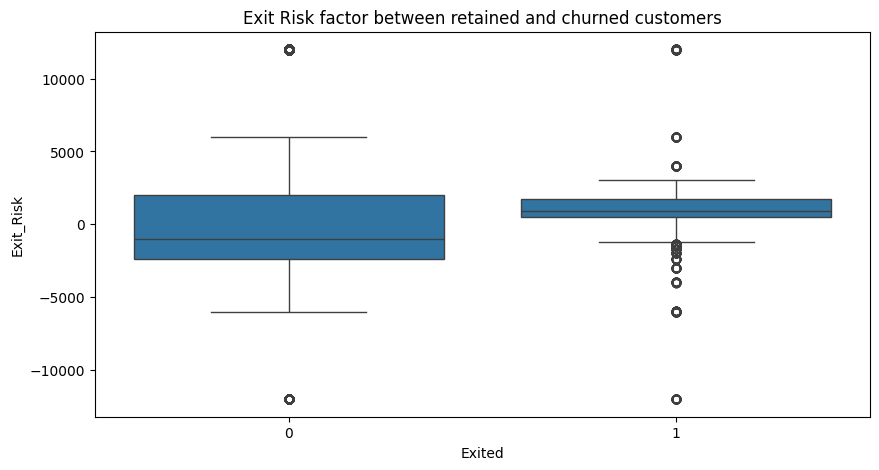

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Exited'], y=df['Exit_Risk'])
plt.title("Exit Risk factor between retained and churned customers")
plt.show()

Looking closely at the graph, we can see the following:

- Difference in Mean: It appears that the mean exit risk factor for customers who left the bank is significantly higher than the mean exit risk factor for customers who stayed with the bank. This indicates that customers with a higher exit risk factor are more likely to leave the bank.

- Data dispersion: The dispersion of the data is relatively high in both groups, but the dispersion of the data is higher for customers who stayed with the bank.

- Outliers: There are outliers in both groups. These data indicate customers with very high or very low exit risk factors. Especially in the group of customers who left the bank, there are more outliers with very high values, which could indicate a relationship between high exit risk factor and leaving the bank.

- Conclusion:
In general, there seems to be a strong relationship between "exit risk factor" and "leaving the bank". Customers with a higher exit risk factor are more likely to leave the bank.